In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [9]:
# concat all features
df_train = pd.read_csv('data/train_data_cleaned.csv', sep=',')
df_test = pd.read_csv('data/test_data_cleaned.csv', sep=',')

schools01 = pd.read_csv('data/primary_school_01.csv', sep=',')
schools01_test = pd.read_csv('data/primary_school_01_test.csv', sep=',')
schools02 = pd.read_csv('data/primary_school_02.csv', sep=',')
schools02_test = pd.read_csv('data/primary_school_02_test.csv', sep=',')
schools03 = pd.read_csv('data/primary_school_03.csv', sep=',')
schools03_test = pd.read_csv('data/primary_school_03_test.csv', sep=',')

secschool01 = pd.read_csv('data/sec_school_01.csv', sep=',')
secschool01_test = pd.read_csv('data/sec_school_01_test.csv', sep=',')
secschool02 = pd.read_csv('data/sec_school_02.csv', sep=',')
secschool02_test = pd.read_csv('data/sec_school_02_test.csv', sep=',')
secschool03 = pd.read_csv('data/sec_school_03.csv', sep=',')
secschool03_test = pd.read_csv('data/sec_school_03_test.csv', sep=',')

shopping01 = pd.read_csv('data/shopping_01.csv', sep=',')
shopping01_test = pd.read_csv('data/shopping_01_test.csv', sep=',')
shopping02 = pd.read_csv('data/shopping_02.csv', sep=',')
shopping02_test = pd.read_csv('data/shopping_02_test.csv', sep=',')
shopping03 = pd.read_csv('data/shopping_03.csv', sep=',')
shopping03_test = pd.read_csv('data/shopping_03_test.csv', sep=',')

hawker_01 = pd.read_csv('data/hawker_01.csv', sep=',')
hawker_01_test = pd.read_csv('data/hawker_01_test.csv', sep=',')
hawker_02 = pd.read_csv('data/hawker_02.csv', sep=',')
hawker_02_test = pd.read_csv('data/hawker_02_test.csv', sep=',')
hawker_03 = pd.read_csv('data/hawker_03.csv', sep=',')
hawker_03_test = pd.read_csv('data/hawker_03_test.csv', sep=',')

cc01 = pd.read_csv('data/cc_01.csv', sep=',')
cc01_test = pd.read_csv('data/cc_01_test.csv', sep=',')
cc02 = pd.read_csv('data/cc_02.csv', sep=',')
cc02_test = pd.read_csv('data/cc_02_test.csv', sep=',')
cc03 = pd.read_csv('data/cc_03.csv', sep=',')
cc03_test = pd.read_csv('data/cc_03_test.csv', sep=',')

train_01 = pd.read_csv('data/train_01.csv', sep=',')
train_01_test = pd.read_csv('data/train_01_test.csv', sep=',')
train_02 = pd.read_csv('data/train_02.csv', sep=',')
train_02_test = pd.read_csv('data/train_02_test.csv', sep=',')
train_03 = pd.read_csv('data/train_03.csv', sep=',')
train_03_test = pd.read_csv('data/train_03_test.csv', sep=',')

train_data = pd.concat([df_train[df_train.columns.values[:-1]], 
                        schools01, schools02, schools03, 
                        secschool01, secschool02, secschool03,
                        shopping01, shopping02, shopping03,
                        hawker_01, hawker_02, hawker_03,
                        cc01, cc02, cc03,
                        train_01, train_02, train_03,
                        df_train['price']], axis=1)
test_data = pd.concat([df_test, schools01_test, schools02_test, schools03_test, 
                       secschool01_test, secschool02_test, secschool03_test, 
                       shopping01_test, shopping02_test, shopping03_test, 
                       hawker_01_test, hawker_02_test, hawker_03_test,
                       cc01_test, cc02_test, cc03_test, train_01_test, train_02_test, train_03_test], axis=1)

In [ ]:
train_len = train_data.shape[0]
train_data.shape, test_data.shape

In [ ]:
train_labels = train_data.price
train_data = train_data.drop(columns = ['price'])
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)
all_data = all_data.drop(columns=['lat','lng'])
all_data.shape

In [ ]:
# label encoder
le_cols = ['name', 'street', 'planning_area','subszone','built_year']
for c in le_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
all_data = pd.get_dummies(all_data, dummy_na=False)
print(all_data.shape)

In [10]:
le_cols = ['name', 'street', 'planning_area','subszone','built_year']
for c in le_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_data[c].values)) 
    train_data[c] = lbl.transform(list(train_data[c].values))
train_data = pd.get_dummies(train_data, dummy_na=False)
train_data.shape

(25714, 41)

In [11]:
train_data.dtypes

name                             int64
street                           int64
bedrooms                       float64
bathrooms                      float64
district                         int64
planning_area                    int64
subszone                         int64
lat                            float64
lng                            float64
tenure                           int64
built_year                       int64
no_of_units                    float64
area_size                      float64
primary_school_0to1            float64
primary_school_0to2            float64
primary_school_0to3            float64
sec_school_0to1                float64
sec_school_0to2                float64
sec_school_0to3                float64
shopping_0to1                  float64
shopping_0to2                  float64
shopping_0to3                  float64
hawker_0to1                    float64
hawker_0to2                    float64
hawker_0to3                    float64
cc_0to1                  

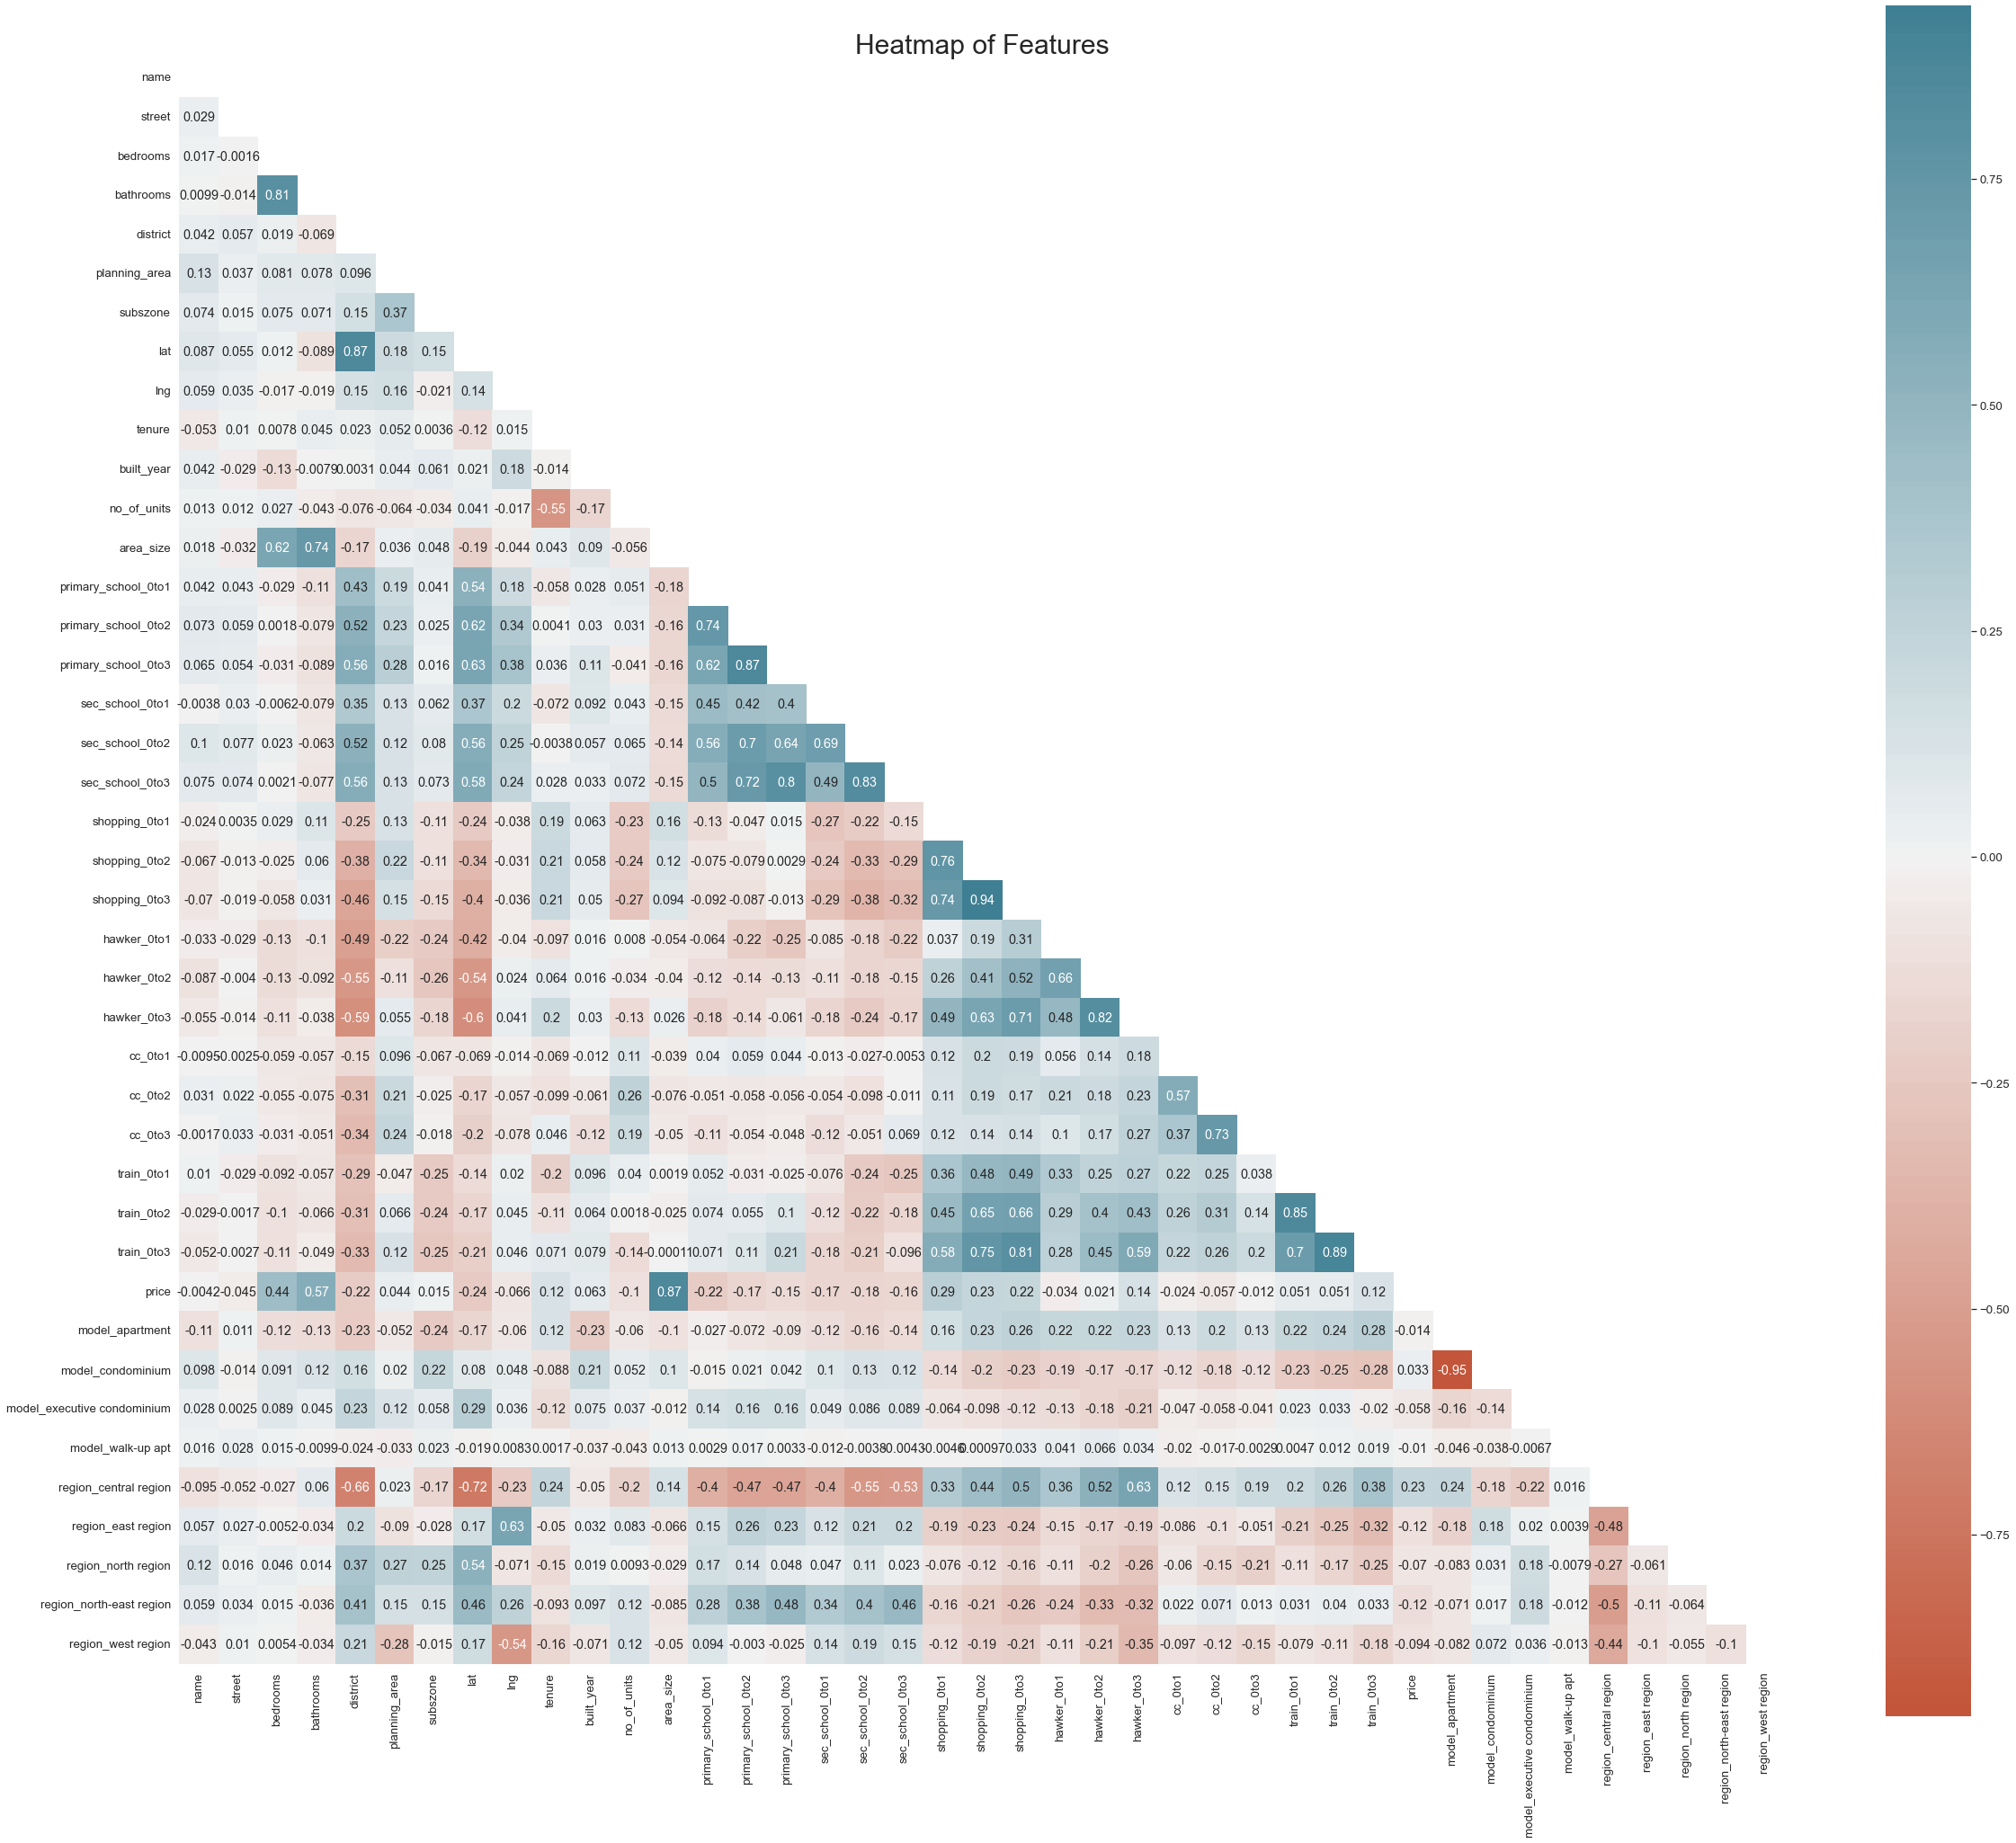

In [17]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
plt.subplots(figsize = (40,35))
data_corr = train_data.corr()
mask = np.zeros_like(data_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_corr, square = True, cmap=sns.diverging_palette(20, 220, n=200), mask = mask, linecolor = 'white', annot = True, center = 0)
plt.title("Heatmap of Features", fontsize = 30)
plt.savefig('images/corr.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# split train and test data
all_data_ensemble = all_data.copy()
all_data_ensemble['bed_bath_ratio'] = all_data_ensemble['bedrooms']/all_data_ensemble['bathrooms']
train_data_ensemble = all_data_ensemble[:train_len]
test_data_ensemble = all_data_ensemble[train_len:]
train_data_ensemble.shape, test_data_ensemble.shape

In [ ]:
# 0.9760407113921235
# fit the model
m = RandomForestRegressor(n_jobs=-1, n_estimators=1050, max_depth=25, min_samples_leaf=1, min_samples_split=2, max_features=0.5, oob_score=True)
m.fit(train_data_ensemble, train_labels)
m.oob_score_

In [ ]:
# feature importance
def plot_feature_importance(m, df, title, model_name):
    sns.set(font_scale = 1.5)
    sns.set_style("white")
    print(pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False))
    #Create arrays from feature importance and feature names
    feature_importance = np.array(m.feature_importances_)
    feature_names = np.array(df.columns)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,12))
    #Plot Searborn bar chart
    ax = sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    sns.despine(trim=True, top=True, right=True, left=True, bottom=False)
    plt.title(title)
    plt.xlabel('Feature IMPORTANCE')
    plt.ylabel('Feature NAMES')
    plt.savefig('imgaes/fi_'+model_name+'.png', dpi=600, bbox_inches='tight')
    plt.show()
    
plot_feature_importance(m, train_data_ensemble, 'Random Forest Regressor Feature Importance', 'RandomForest')

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(learning_rate=0.1, gamma=0,
                             max_depth=5, min_child_weight = 1,
                             n_estimators=6000, colsample_bytree=0.6,
                             reg_alpha=0.5, reg_lambda=1.0,
                             subsample=0.7, random_state = 42, nthread = -1)
model_xgb.fit(train_data_ensemble, train_labels)
plot_feature_importance(model_xgb, train_data_ensemble, 'XGBoost Regressor Feature Importance', 'XGB')

In [ ]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression', 
                       num_leaves=25, learning_rate=0.2, 
                       max_bin = 200, n_estimators=1000,
                       random_state=42)
model_lgb.fit(train_data_ensemble, train_labels)
plot_feature_importance(model_lgb, train_data_ensemble, 'LightGBM Regressor Feature Importance', 'LGB')